In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D

In [2]:
batch_size = 32
epoch_size = 15
target_size = (256, 256)
directory = "..\\Datasets\\sachinkumar413\\Splitted_Dataset"

trainDatagen = ImageDataGenerator(rescale= 1/255.)
testDatagen = ImageDataGenerator(rescale= 1/255.)
validationDatagen = ImageDataGenerator(rescale= 1/255.)

train = trainDatagen.flow_from_directory(directory= f"{directory}/train", batch_size= batch_size, class_mode= 'categorical', target_size= target_size, shuffle= True)
test = testDatagen.flow_from_directory(directory= f"{directory}/test", batch_size= batch_size, class_mode= "categorical", target_size= target_size, shuffle= False)
validation = validationDatagen.flow_from_directory(directory= f"{directory}/val", batch_size= batch_size, class_mode= "categorical", target_size= target_size, shuffle= False)

Found 2200 images belonging to 5 classes.
Found 275 images belonging to 5 classes.
Found 275 images belonging to 5 classes.


In [3]:
Network = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

Network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

In [4]:
Network.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

history = Network.fit(train, epochs= epoch_size, verbose= 'auto', validation_data= validation)

Epoch 1/15
69/69 [==============================] - 6s 71ms/step - loss: 1.7175 - accuracy: 0.4918 - val_loss: 1.0465 - val_accuracy: 0.6036
Epoch 2/15
69/69 [==============================] - 4s 56ms/step - loss: 1.0460 - accuracy: 0.6177 - val_loss: 0.9332 - val_accuracy: 0.6400
Epoch 3/15
69/69 [==============================] - 4s 57ms/step - loss: 0.9883 - accuracy: 0.6400 - val_loss: 0.9168 - val_accuracy: 0.6509
Epoch 4/15
69/69 [==============================] - 4s 58ms/step - loss: 0.9578 - accuracy: 0.6486 - val_loss: 0.9082 - val_accuracy: 0.6545
Epoch 5/15
69/69 [==============================] - 4s 55ms/step - loss: 0.9341 - accuracy: 0.6464 - val_loss: 0.8802 - val_accuracy: 0.6764
Epoch 6/15
69/69 [==============================] - 4s 55ms/step - loss: 0.9006 - accuracy: 0.6600 - val_loss: 0.8834 - val_accuracy: 0.6509
Epoch 7/15
69/69 [==============================] - 4s 57ms/step - loss: 0.8932 - accuracy: 0.6632 - val_loss: 0.8553 - val_accuracy: 0.6727
Epoch 8/15
69

In [5]:
test_generator_loss, test_generator_accuracy = Network.evaluate(test, steps=test.samples // batch_size)
print(f'test_generator Loss: {test_generator_loss}, test_generator Accuracy: {test_generator_accuracy}')

Network.evaluate(test)

8/8 [==============================] - 0s 54ms/step - loss: 0.7648 - accuracy: 0.7227
test_generator Loss: 0.76479172706604, test_generator Accuracy: 0.72265625
9/9 [==============================] - 0s 50ms/step - loss: 0.8768 - accuracy: 0.6800


[0.8767825365066528, 0.6800000071525574]

In [6]:
print("Training Loss: ", history.history['loss'][-1])
print("Training Accuracy: ", history.history['accuracy'][-1])
print("Validation Loss: ", history.history['val_loss'][-1])
print("Validation Accuracy: ", history.history['val_accuracy'][-1])

Training Loss:  0.6741538047790527
Training Accuracy:  0.735909104347229
Validation Loss:  0.8825026154518127
Validation Accuracy:  0.6581818461418152


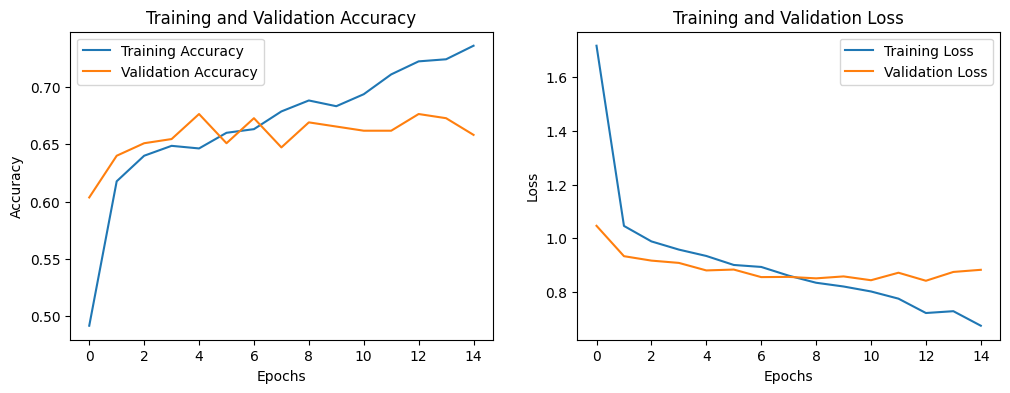

In [7]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(train_acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='best')
ax1.set_title('Training and Validation Accuracy')

ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')
ax2.set_title('Training and Validation Loss')

plt.show()